# **Hypothesis Testing**

### **Question**: How much does the *sample mean* of purchase prices differ from the *population mean* of purchase prices? If there is a difference, is it significant? If so, how significant is it?  
 
### **Null Hypothesis**: The sample mean for purchase prices is significantly higher than the population mean for purchase prices.

### **Alternative Hypothesis**: The sample mean for purchase prices is different from the population mean for purchase prices.
### ----> *h1*: Sample mean is greater than population mean.
### ----> *h2*: Sample mean is greater than OR less than population mean.
### ----> *h3*: Sample mean is less than population mean. 

In [105]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [106]:
data = pd.read_csv("Carmax - Main (Modified).csv", index_col=0)
df = data.copy()
test_df = df.loc[0:, ["purchase_price"]]
test_df 

,purchase_price
0,17501
1,17501
2,27501
3,12501
4,17501
...,...
355869,17501
355870,12501
355871,17501
355872,12501


In [107]:
pop_mean_price = round(test_df["purchase_price"].mean()) # population mean for purchase prices
pop_mean_price 

19241

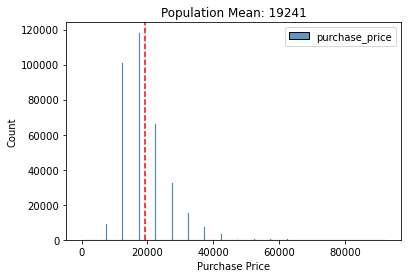

In [108]:
sns.histplot(test_df, stat='count')
plt.axvline(pop_mean_price,color='r',linestyle='dashed')
plt.title(f"Population Mean: {pop_mean_price}")
plt.xlabel("Purchase Price")
plt.show() 

In [109]:
rand_samps = test_df['purchase_price'].sample(350)
rand_samps_df = pd.DataFrame(data=rand_samps) 
rand_samps_df 

,purchase_price
17551,12501
61628,12501
69352,12501
21631,12501
273999,12501
...,...
115,22501
25282,22501
223373,22501
34771,17501


In [110]:
samp_mean_price = round(rand_samps_df["purchase_price"].mean())
samp_mean_price 

18930

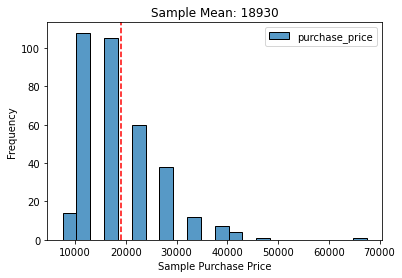

In [111]:
sns.histplot(rand_samps_df, stat='count')
plt.axvline(samp_mean_price,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {samp_mean_price}")
plt.ylabel("Frequency")
plt.xlabel("Sample Purchase Price")
plt.show() 

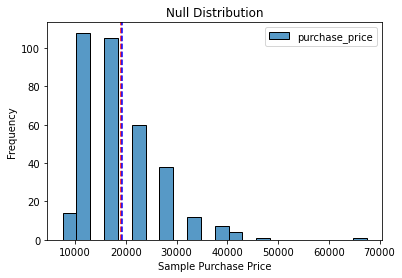

In [112]:
sns.histplot(rand_samps_df, stat='count')
plt.axvline(samp_mean_price,color='r',linestyle='dashed')
plt.axvline(pop_mean_price, color='b', linestyle='dashed')
plt.title("Null Distribution")
plt.ylabel("Frequency")
plt.xlabel("Sample Purchase Price")
plt.show() 

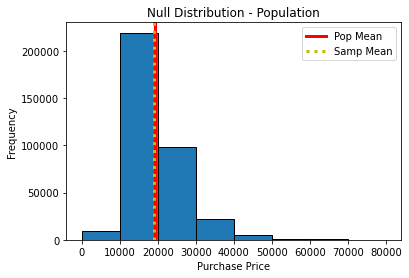

In [113]:
plt.hist(test_df, range=(0, 80000), bins=8,  edgecolor='black')
plt.title("Null Distribution - Population")
plt.xlabel("Purchase Price")
plt.ylabel("Frequency")
plt.axvline(pop_mean_price, color='r', linestyle='solid', linewidth=3, label="Pop Mean")
plt.axvline(samp_mean_price, color='y', linestyle='dotted', linewidth=3, label="Samp Mean")
plt.legend()

plt.show() 

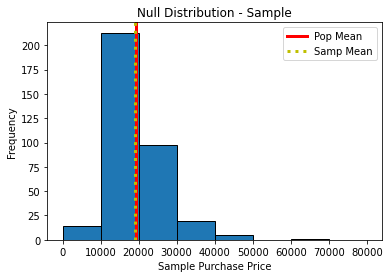

In [114]:
plt.hist(rand_samps_df, range=(0, 80000), bins=8,  edgecolor='black')
plt.title("Null Distribution - Sample")
plt.xlabel("Sample Purchase Price")
plt.ylabel("Frequency")
plt.axvline(pop_mean_price, color='r', linestyle='solid', linewidth=3, label="Pop Mean")
plt.axvline(samp_mean_price, color='y', linestyle='dotted', linewidth=3, label="Samp Mean")
plt.legend()

plt.show() 

In [115]:
from scipy.stats import ttest_1samp

tstat, pval = ttest_1samp(rand_samps_df, pop_mean_price)
print(pval)

[0.44300616]
